In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\emoin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
train=pd.read_excel("C:/Users/emoin/OneDrive/Aegis Study Material/hackathon/flight_price/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
test=pd.read_excel("C:/Users/emoin/OneDrive/Aegis Study Material/hackathon/flight_price/Flight_Ticket_Participant_Datasets/Test_set.xlsx")
validation=pd.read_excel("C:/Users/emoin/OneDrive/Aegis Study Material/hackathon/flight_price/Flight_Ticket_Participant_Datasets/Sample_submission.xlsx")

In [8]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


train=train[0:int(np.round(0.8*(len(train))))]
test = train[int(np.round(0.8*(len(train)))):]

In [10]:
df1 = pd.read_excel("C:/Users/emoin/OneDrive/Aegis Study Material/hackathon/flight_price/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
df2=pd.read_excel("C:/Users/emoin/OneDrive/Aegis Study Material/hackathon/flight_price/Flight_Ticket_Participant_Datasets/Test_set.xlsx")

In [11]:
print(train.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


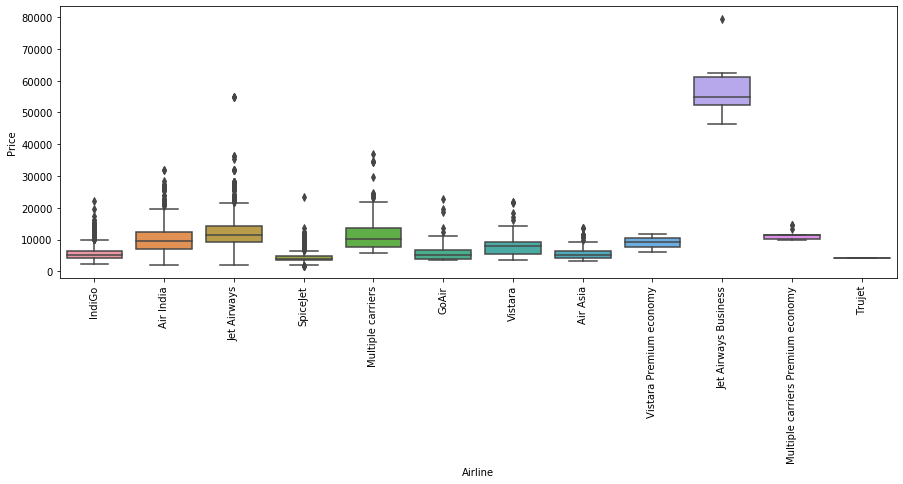

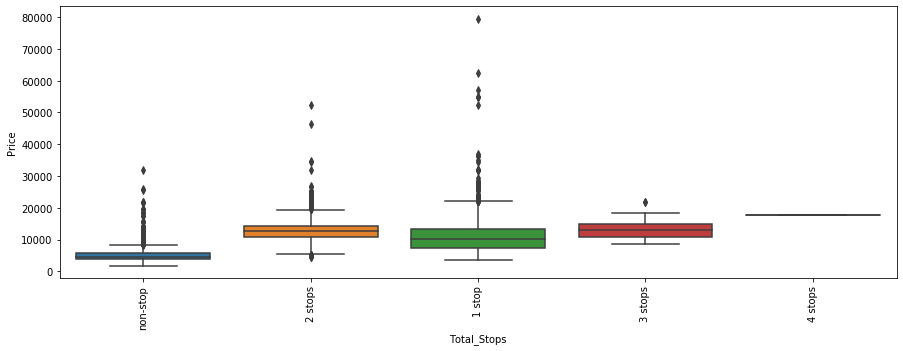

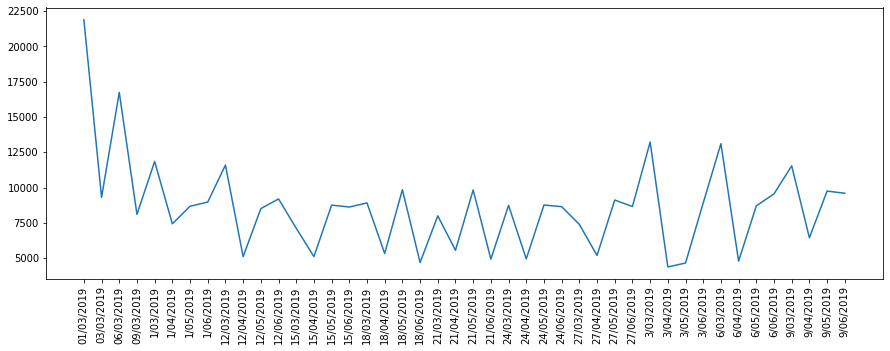

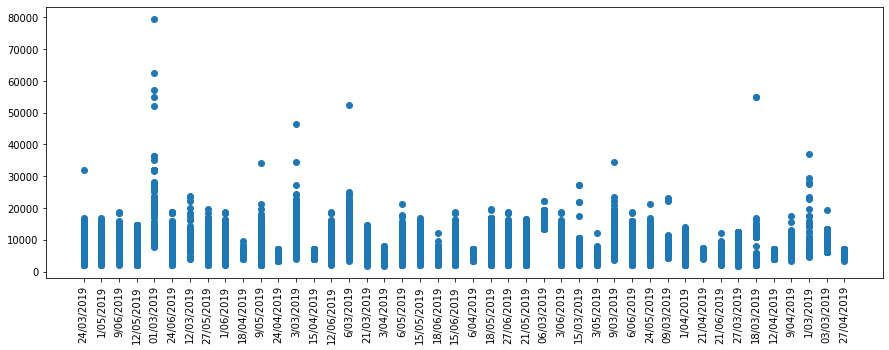

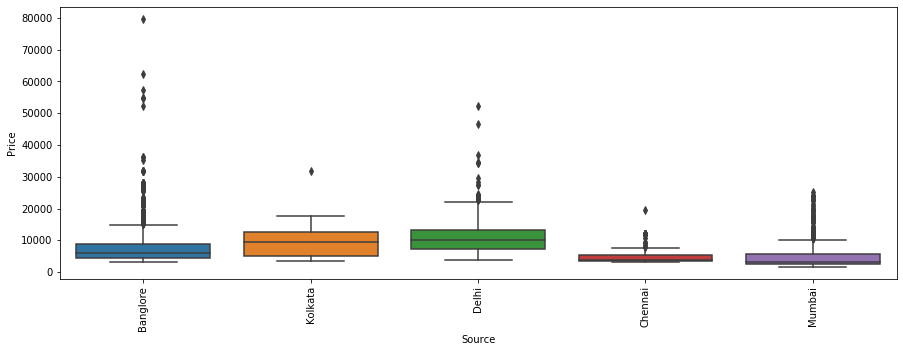

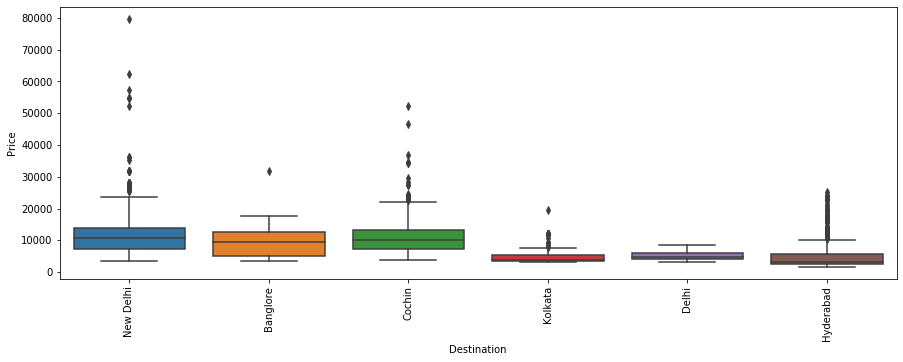

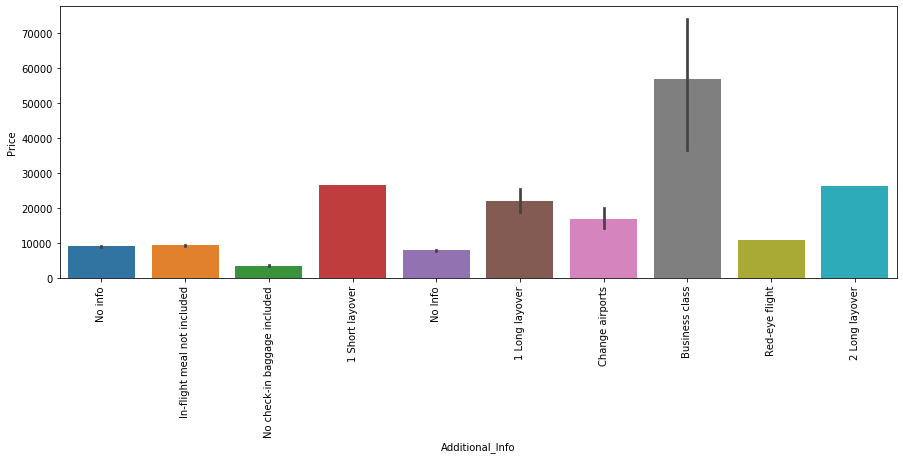

In [12]:
#Visually understanding the variation of price with different columns
plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Airline, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Total_Stops, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.plot(train.sort_values(['Date_of_Journey']).Date_of_Journey.unique(), train.groupby(['Date_of_Journey']).Price.mean())

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
plt.scatter(train.Date_of_Journey, train.Price)

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Source, train.Price )

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(train.Destination, train.Price )

plt.subplots(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(train.Additional_Info, train.Price )

In [13]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
# Converting Dep_Time from object (string) to time format
train.Dep_Time=pd.to_datetime(train.Dep_Time, infer_datetime_format=True).dt.time

In [15]:
# String manipulation to extract only hours and minutes from arrival_time column and dropping the date part, then 
# converting the string to time format as done above
train.Arrival_Time=train.Arrival_Time.str.slice(0,6)#removing month
train.Arrival_Time=train.Arrival_Time.str.strip()#removing space
train.Arrival_Time=pd.to_datetime(train.Arrival_Time, format = '%H:%M').dt.time#coverting to time format

In [16]:
# Converting date of journey to date format
train.Date_of_Journey=pd.to_datetime(train.Date_of_Journey,format='%d/%m/%Y').dt.date

In [17]:
#converting duration column to minutes
minute=train['Duration'].str.slice(3,).str.extract('(\d+)')#slicing and then extracting two decimal nos. i.e minutes
hour=train['Duration'].str.extract('(\d+)').astype('int')#to extract 1st two decimal nos i.e hours
minute=minute.fillna(0) #filling up minute= 0 where the flight duration only had hours
train['Duration']=minute.astype('int')+hour*60#converting duration column into minutes

In [18]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1 stop,No info,13302


In [19]:
# Creating column date of arrival by adding date and time of journey with duration in minutes
train['Date_of_Arrival']=train.apply(lambda r : pd.datetime.combine(r['Date_of_Journey'],r['Dep_Time']),1) + pd.to_timedelta(train.Duration,unit='m')
train['Date_of_Arrival']=train.Date_of_Arrival.dt.date

C:\Users\emoin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [20]:
train.Date_of_Arrival.head()

0    2019-03-25
1    2019-05-01
2    2019-06-10
3    2019-05-12
4    2019-03-01
Name: Date_of_Arrival, dtype: object

## treating Total_Stops column

In [21]:
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
# Changing Total Stops from a string value to a categorical value 
dic={'non-stop':'0','2 stops':'2','1 stop':'1','3 stops':'3','4 stops': '4'}
train['Total_Stops']=train.Total_Stops.map(dic)
train.Total_Stops=train.Total_Stops.astype('category')

In [23]:
train['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: category
Categories (5, object): [0, 1, 2, 3, 4]

In [24]:
#train.Total_Stops.apply(lambda x : x.map(dic))

In [25]:
#train.Airline.str.split(' ',expand=True).get(2).value_counts()

## changing additional info column to categorical

In [26]:
train.Additional_Info.unique().shape

(10,)

In [27]:
a = train.Additional_Info.unique()

In [28]:
a[1]

'In-flight meal not included'

In [29]:
dic2 = {}
for i in range(0,10):
    dic2.update({a[i]:i})

In [30]:
dic2

{'No info': 0,
 'In-flight meal not included': 1,
 'No check-in baggage included': 2,
 '1 Short layover': 3,
 'No Info': 4,
 '1 Long layover': 5,
 'Change airports': 6,
 'Business class': 7,
 'Red-eye flight': 8,
 '2 Long layover': 9}

In [31]:
train['Additional_Info']=train.Additional_Info.map(dic2)
train.Additional_Info=train.Additional_Info.astype('category')

In [32]:
train['Additional_Info']

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Additional_Info, Length: 10683, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

## Treating Airline Column

In [33]:
train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
b = train.Airline.unique()

In [35]:
dic3 = {}
for i in range(0,12):
    dic3.update({b[i]:i})

In [36]:
dic3

{'IndiGo': 0,
 'Air India': 1,
 'Jet Airways': 2,
 'SpiceJet': 3,
 'Multiple carriers': 4,
 'GoAir': 5,
 'Vistara': 6,
 'Air Asia': 7,
 'Vistara Premium economy': 8,
 'Jet Airways Business': 9,
 'Multiple carriers Premium economy': 10,
 'Trujet': 11}

In [37]:
train['Airline']=train.Airline.map(dic3)
train.Airline=train.Airline.astype('category')

In [38]:
train.Airline

0        0
1        1
2        2
3        0
4        0
        ..
10678    7
10679    1
10680    2
10681    6
10682    1
Name: Airline, Length: 10683, dtype: category
Categories (12, int64): [0, 1, 2, 3, ..., 8, 9, 10, 11]

## creating same day travel column

In [39]:
# Creating an integer column same_day_travel that highlights whether the flight was arrived the same day, a day from dep, or more..
train['Same_day_travel']=train.Date_of_Arrival-train.Date_of_Journey
train['Same_day_travel']=train.Same_day_travel.astype('category')

In [40]:
train.Same_day_travel.dtype

CategoricalDtype(categories=['0 days', '1 days', '2 days'], ordered=False)

## next

In [41]:
# Creating 2 columns weekday journey and weekday arrival that highligh what day of the week the flight took off and arrived
# respectively. The idea is that the price will be marginally higher on weekends and this metric can help catch that.
train['weekday_journey']=train['Date_of_Journey'].apply(lambda x: x.weekday())
train['weekday_arrival']=train['Date_of_Arrival'].apply(lambda x: x.weekday())

## treating datetime columns

In [42]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Arrival,Same_day_travel,weekday_journey,weekday_arrival
0,0,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,170,0,0,3897,2019-03-25,1 days,6,0
1,1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,445,2,0,7662,2019-05-01,0 days,2,2
2,2,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,1140,2,0,13882,2019-06-10,1 days,6,0
3,0,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,325,1,0,6218,2019-05-12,0 days,6,6
4,0,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,285,1,0,13302,2019-03-01,0 days,4,4


In [43]:
train['Year']=pd.DatetimeIndex(train['Date_of_Journey']).year
train['month_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).month
train['day_of_journey']=pd.DatetimeIndex(train['Date_of_Journey']).day
#nxt
#train['month_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).month
train['day_of_Arrival']=pd.DatetimeIndex(train['Date_of_Arrival']).day

## next

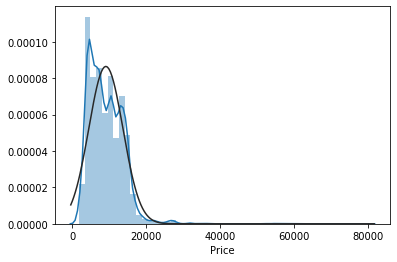

In [44]:
from scipy import stats
sns.distplot(train.Price, fit=stats.norm)
plt.show()

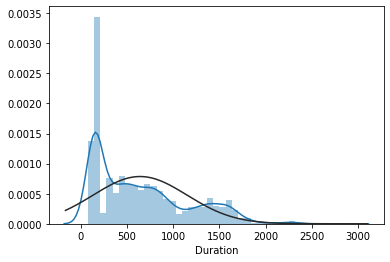

In [45]:
sns.distplot(train.Duration, fit=stats.norm)
plt.show()

## data traetment for target column and Duration

In [46]:
train.Price=np.log(train.Price)

In [47]:
train.Duration=np.log(train.Duration)

## missing values

In [48]:
##Identifying columns with missing values
train.isna().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info     0
Price               0
Date_of_Arrival     0
Same_day_travel     0
weekday_journey     0
weekday_arrival     0
Year                0
month_of_journey    0
day_of_journey      0
day_of_Arrival      0
dtype: int64

In [49]:
train.loc[(train.Route.isna())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Arrival,Same_day_travel,weekday_journey,weekday_arrival,Year,month_of_journey,day_of_journey,day_of_Arrival
9039,1,2019-05-06,Delhi,Cochin,NaN,09:45:00,09:25:00,7.258412,NaN,0,8.919988,2019-05-07,1 days,0,1,2019,5,6,7


In [50]:
train1 = train.dropna(how='any')

In [51]:
train1.shape

(10682, 19)

In [52]:
train.isna().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info     0
Price               0
Date_of_Arrival     0
Same_day_travel     0
weekday_journey     0
weekday_arrival     0
Year                0
month_of_journey    0
day_of_journey      0
day_of_Arrival      0
dtype: int64

train.Route.fillna('DEL → COK',inplace=True)
train.Total_Stops.fillna('0',inplace=True)

In [53]:
train.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [54]:
#train[train.Airline==1][['Total_Stops','Airline']].groupby('Airline').count()

In [55]:
numeric_cols = train.select_dtypes(include=['number'])

In [56]:
numeric_cols

,Duration,Price,weekday_journey,weekday_arrival,Year,month_of_journey,day_of_journey,day_of_Arrival
0,5.135798,8.267962,6,0,2019,3,24,25
1,6.098074,8.944028,2,2,2019,5,1,1
2,7.038784,9.538348,6,0,2019,6,9,10
3,5.783825,8.735204,6,6,2019,5,12,12
4,5.652489,9.495670,4,4,2019,3,1,1
...,...,...,...,...,...,...,...,...
10678,5.010635,8.320448,1,1,2019,4,9,9
10679,5.043425,8.329658,5,5,2019,4,27,27
10680,5.192957,8.885856,5,5,2019,4,27,27
10681,5.075174,9.445254,4,4,2019,3,1,1


In [57]:
train1.Year.value_counts()

2019    10682
Name: Year, dtype: int64

In [58]:
train1.drop(columns='Year',inplace=True)

C:\Users\emoin\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Pre-Modelling

In [59]:
# Creating a sparse matrix using pandas get dummies function that helps split string columns into boolean values.
#df_dummy=pd.get_dummies(train1)

In [60]:
train1.shape

(10682, 18)

In [61]:
train_df=pd.get_dummies(train1,drop_first=True)

In [63]:
train_df.shape

(10682, 742)

In [53]:
train_df.head(2)

,Duration,Price,weekday_journey,weekday_arrival,month_of_journey,day_of_journey,day_of_Arrival,Airline_0,Airline_1,Airline_2,...,Date_of_Arrival_2019-06-22,Date_of_Arrival_2019-06-24,Date_of_Arrival_2019-06-25,Date_of_Arrival_2019-06-26,Date_of_Arrival_2019-06-27,Date_of_Arrival_2019-06-28,Date_of_Arrival_2019-06-29,Same_day_travel_0 days 00:00:00,Same_day_travel_1 days 00:00:00,Same_day_travel_2 days 00:00:00
0,5.135798,8.267962,6,0,3,24,25,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6.098074,8.944028,2,2,5,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
# Removing Price from independent variable data and keeping only price in the other
df=train_df.drop('Price',axis=1)
y=train_df['Price']

# Splitting test and train data
train=train[0:int(np.round(0.8*(len(train))))]
test = train[int(np.round(0.8*(len(train)))):]

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2)

## XGboost

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

C:\Users\emoin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\emoin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\emoin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [58]:
xgb=XGBRegressor(learning_rate =0.1, 
      n_estimators=500, max_depth=12, min_child_weight=1,gamma=0, reg_alpha=2e-5,
      subsample=0.8,colsample_bytree=0.8,
      nthread=4,scale_pos_weight=1,seed=27,verbose=True,random_state=10)

In [65]:
X = np.array(x)
Y = np.array(y)

In [72]:
X_test = np.array(x_test)
Y_test = np.array(y_test)

In [59]:
xgb.fit(X_train,y_train)

[11:25:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=12,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=10, reg_alpha=2e-05,
             reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbose=True,
             verbosity=None)

In [60]:
#predicting the train price values
y_pred=xgb.predict(X_train)

In [62]:
xgb.score(X_train,y_train)

0.9934281284119201

In [63]:
#mean_squared_error(y,y_pred)

In [65]:
# Predictions of test data
Predict=xgb.predict(X_test)

In [66]:
# Converting price back to original scale and making it integer
Predict=np.exp(Predict)
#Predict=Predict.astype(int)

In [76]:
data = {'Prediction':Predict,
       'Actual':np.exp(y_test)}

In [77]:
final = pd.DataFrame(data)

In [78]:
final

,Prediction,Actual
9047,3694.299316,4995.0
2873,8897.977539,8085.0
3561,12475.016602,12898.0
6735,13390.083984,13014.0
8590,13244.627930,13784.0
...,...,...
1290,6823.721680,4441.0
2364,13787.333008,13555.0
10607,8240.938477,8765.0
7456,19399.009766,16697.0


In [86]:
def rmsle_cv(model):
    kfold=KFold(n_splits=2, shuffle=True, random_state=10).get_n_splits(X_train)
    rmse=np.sqrt(-cross_val_score(model,X_train,y_train,cv=kfold, scoring='neg_mean_squared_error'))
    return rmse

In [87]:
rmsle_cv(xgb).mean()

[11:38:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:39:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.12492634206171921

In [106]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error

In [83]:
np.sqrt(mse(final.Prediction,final.Actual))

1088.525711895522

## Hyper parameter tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from xgboost import XGBRegressor

In [86]:
classifier = XGBRegressor()

In [69]:
params = {
    'n_estimators'     : [100,200,300,400,500],
    'learning_rate'    : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth'        : [1,2,3,4,5,6,8,10],
    'min_child_weight' : [1,3,5,7,10],
    'colsample_bytree' : [0.3,0.4,0.6,0.8],
    'gamma'            : [0,0.1,0.2,0.3,0.4]
}

In [91]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,n_jobs=1,cv=3,verbose=3,scoring='neg_mean_squared_error')

In [92]:
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=300, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, score=0.809, total=   4.6s
[CV] n_estimators=300, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=300, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, score=0.810, total=   4.3s
[CV] n_estimators=300, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s


[CV]  n_estimators=300, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0.3, colsample_bytree=0.3, score=0.805, total=   4.3s
[CV] n_estimators=400, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.3 
[CV]  n_estimators=400, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.3, score=0.823, total=   5.6s
[CV] n_estimators=400, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.3 
[CV]  n_estimators=400, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.3, score=0.823, total=   5.8s
[CV] n_estimators=400, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.3 
[CV]  n_estimators=400, min_child_weight=5, max_depth=1, learning_rate=0.1, gamma=0, colsample_bytree=0.3, score=0.819, total=   5.6s
[CV] n_estimators=500, min_child_weight=1, max_depth=4, learning_rate=0.15, gamma=0.4, colsample_bytree=0.4 
[CV]  n_estimators=500, min_child_w

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=5, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.6,
                                                         

In [93]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [94]:
random_search.best_params_

{'n_estimators': 500,
 'min_child_weight': 7,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [96]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=7, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [97]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [99]:
model.score(X_test,y_test)

0.9291919464872233

In [100]:
predict = model.predict(X_test)

In [102]:
data = {'Prediction':np.exp(predict),
       'Actual':np.exp(y_test)}

In [103]:
final = pd.DataFrame(data)

In [104]:
final

,Prediction,Actual
1601,10516.394531,10262.0
5508,10530.153320,11982.0
295,7299.730469,7229.0
3115,3902.962646,3898.0
7420,7181.783203,6526.0
...,...,...
5866,9646.898438,10413.0
9942,12811.816406,12778.0
7092,3781.683594,3841.0
5257,8913.605469,8309.0


In [107]:
np.sqrt(mse(final.Prediction,final.Actual))

1804.1782779178454